In [3]:
# importing modules 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn   # This imports the scikit-learn library
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from google.colab import files
from datetime import datetime, timedelta
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

uploaded=files.upload()   # browse and upload dataset.csv
temp = pd.read_csv("Temperature.csv")
temp.max_temp = pd.to_numeric(temp.max_temp, errors='coerce')
temp.min_temp = pd.to_numeric(temp.min_temp, errors='coerce')
temp.mean_temp = pd.to_numeric(temp.mean_temp, errors='coerce')
temp=temp.dropna()
print(temp.head())
print("Data Shape: ",temp.shape)

Saving Temperature.csv to Temperature.csv
   year  month  day  max_temp  min_temp  mean_temp
0  2007      1    1      24.4      15.0       18.9
1  2007      1    2      21.3      17.1       19.0
2  2007      1    3      22.1      17.9       19.4
3  2007      1    4      20.8      14.8       16.8
4  2007      1    5      19.8      11.8       15.5
Data Shape:  (5777, 6)


In [ ]:
!pip install neuralprophet
from neuralprophet import NeuralProphet

In [33]:
temp2 = temp.copy()
temp2['year']=temp2['year'].astype(str)
temp2['month']=temp2['month'].astype(str)
temp2['day']=temp2['day'].astype(str)
temp2['date'] = temp2[['year', 'month', 'day']].agg('-'.join, axis=1) 
temp2 = temp2.drop(temp2.columns[[0, 1, 2]], axis=1)
temp2['date'] = pd.to_datetime(temp2['date'])

mean_temp = temp2[['date', 'mean_temp']].copy()
mean_temp.dropna(inplace=True)
mean_temp.columns = ['ds', 'y']

max_temp = temp2[['date', 'max_temp']].copy()
max_temp.dropna(inplace=True)
max_temp.columns = ['ds', 'y']

min_temp = temp2[['date', 'min_temp']].copy() 
min_temp.dropna(inplace=True)
min_temp.columns = ['ds', 'y']

In [41]:
n = NeuralProphet()
model = n.fit(mean_temp, freq='D')

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.862% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.862% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO:NP.config:Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 118
INFO:NP.config:Auto-set epochs to 118


  0%|          | 0/144 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 9.53E-02, min: 1.73E+00
INFO:NP.utils_torch:lr-range-test results: steep: 9.53E-02, min: 1.73E+00


  0%|          | 0/144 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 9.53E-02, min: 1.50E+00
INFO:NP.utils_torch:lr-range-test results: steep: 9.53E-02, min: 1.50E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 9.68E-02
INFO:NP.forecaster:lr-range-test selected learning rate: 9.68E-02
Epoch[118/118]: 100%|██████████| 118/118 [00:51<00:00,  2.31it/s, SmoothL1Loss=0.00399, MAE=1.76, RMSE=2.3, Loss=0.00293, RegLoss=0]


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.862% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.862% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 88.889% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 88.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 88.889% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 88.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is

          ds     y residual1      yhat1      trend  season_yearly  \
0 2022-11-11  None       NaN  22.756174  23.767374      -0.987226   
1 2022-11-12  None       NaN  22.709799  23.767181      -1.121744   
2 2022-11-13  None       NaN  22.556124  23.766989      -1.258492   
3 2022-11-14  None       NaN  22.388081  23.766796      -1.397472   
4 2022-11-15  None       NaN  22.174955  23.766602      -1.538657   
5 2022-11-16  None       NaN  22.026613  23.766409      -1.681997   
6 2022-11-17  None       NaN  21.942816  23.766216      -1.827419   
7 2022-11-18  None       NaN  21.767223  23.766024      -1.974825   
8 2022-11-19  None       NaN  21.706099  23.765831      -2.124093   

   season_weekly  
0      -0.023975  
1       0.064362  
2       0.047627  
3       0.018757  
4      -0.052991  
5      -0.057799  
6       0.004018  
7      -0.023975  
8       0.064362  


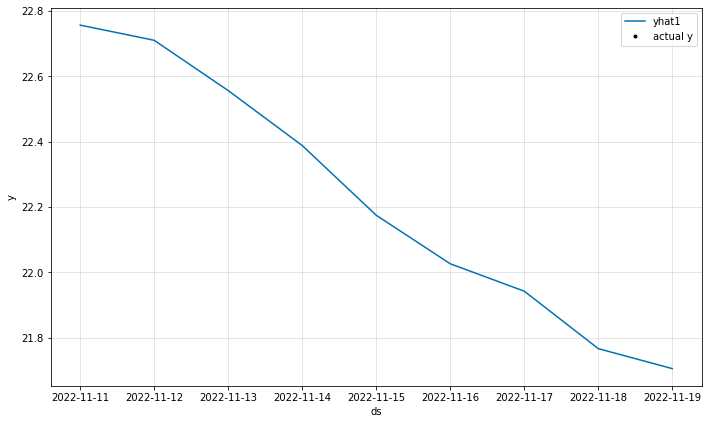

In [42]:
future = n.make_future_dataframe(mean_temp, periods=9)
forecast = n.predict(future)
plot = n.plot(forecast)
print(forecast)

In [43]:
n = NeuralProphet()
model = n.fit(max_temp, freq='D')

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.862% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.862% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO:NP.config:Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 118
INFO:NP.config:Auto-set epochs to 118


  0%|          | 0/144 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.06E-01, min: 9.53E-02
INFO:NP.utils_torch:lr-range-test results: steep: 4.06E-01, min: 9.53E-02


  0%|          | 0/144 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.62E-02, min: 1.10E-01
INFO:NP.utils_torch:lr-range-test results: steep: 4.62E-02, min: 1.10E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.23E-01
INFO:NP.forecaster:lr-range-test selected learning rate: 1.23E-01
Epoch[118/118]: 100%|██████████| 118/118 [00:50<00:00,  2.35it/s, SmoothL1Loss=0.00566, MAE=2.2, RMSE=2.86, Loss=0.00414, RegLoss=0]


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.862% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.862% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 88.889% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 88.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 88.889% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 88.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is

          ds     y residual1      yhat1      trend  season_yearly  \
0 2022-11-11  None       NaN  26.506973  27.043667      -0.553951   
1 2022-11-12  None       NaN  26.386539  27.043411      -0.671652   
2 2022-11-13  None       NaN  26.337040  27.043152      -0.792339   
3 2022-11-14  None       NaN  26.204178  27.042896      -0.916126   
4 2022-11-15  None       NaN  25.909443  27.042641      -1.043091   
5 2022-11-16  None       NaN  25.772667  27.042385      -1.173283   
6 2022-11-17  None       NaN  25.726284  27.042130      -1.306719   
7 2022-11-18  None       NaN  25.615753  27.041874      -1.443378   
8 2022-11-19  None       NaN  25.473194  27.041618      -1.583207   

   season_weekly  
0       0.017257  
1       0.014783  
2       0.086226  
3       0.077408  
4      -0.090109  
5      -0.096438  
6      -0.009128  
7       0.017257  
8       0.014783  


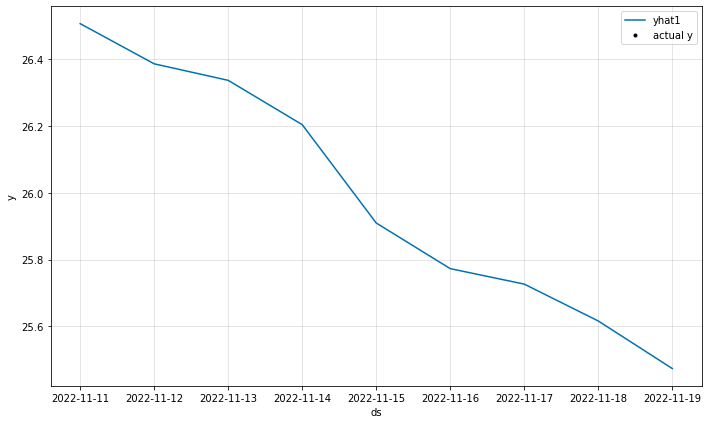

In [44]:
future = n.make_future_dataframe(max_temp, periods=9)
forecast = n.predict(future)
plot = n.plot(forecast)
print(forecast)

In [38]:
n = NeuralProphet()
model = n.fit(min_temp, freq='D')

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.862% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.862% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO:NP.config:Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 118
INFO:NP.config:Auto-set epochs to 118


  0%|          | 0/144 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.13E-02, min: 1.47E-01
INFO:NP.utils_torch:lr-range-test results: steep: 7.13E-02, min: 1.47E-01


  0%|          | 0/144 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.13E-02, min: 1.47E-01
INFO:NP.utils_torch:lr-range-test results: steep: 7.13E-02, min: 1.47E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 7.98E-02
INFO:NP.forecaster:lr-range-test selected learning rate: 7.98E-02
Epoch[118/118]: 100%|██████████| 118/118 [00:59<00:00,  1.98it/s, SmoothL1Loss=0.00445, MAE=1.82, RMSE=2.37, Loss=0.00325, RegLoss=0]


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.862% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.862% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 88.889% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 88.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 88.889% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 88.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is

          ds     y residual1      yhat1      trend  season_yearly  \
0 2022-11-11  None       NaN  20.249323  21.289543      -1.041895   
1 2022-11-12  None       NaN  20.114519  21.289381      -1.183699   
2 2022-11-13  None       NaN  20.000610  21.289219      -1.327977   
3 2022-11-14  None       NaN  19.766010  21.289057      -1.474690   
4 2022-11-15  None       NaN  19.615961  21.288897      -1.623770   
5 2022-11-16  None       NaN  19.524420  21.288734      -1.775130   
6 2022-11-17  None       NaN  19.396748  21.288572      -1.928655   
7 2022-11-18  None       NaN  19.205881  21.288412      -2.084208   
8 2022-11-19  None       NaN  19.055464  21.288250      -2.241624   

   season_weekly  
0       0.001675  
1       0.008838  
2       0.039367  
3      -0.048358  
4      -0.049165  
5       0.010816  
6       0.036829  
7       0.001675  
8       0.008838  


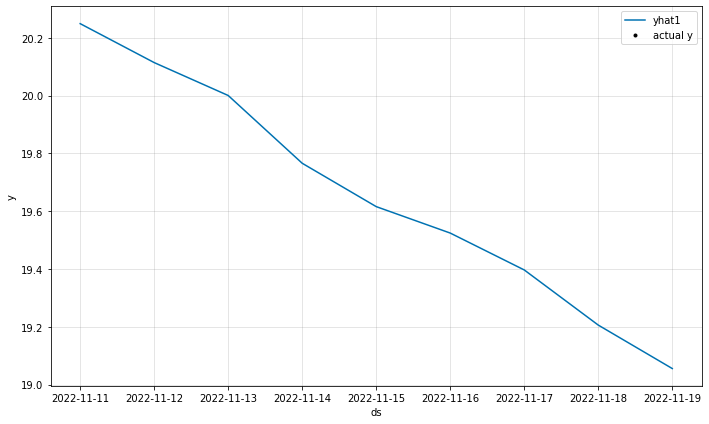

In [39]:
future = n.make_future_dataframe(min_temp, periods=9)
forecast = n.predict(future)
plot = n.plot(forecast)
print(forecast)

In [17]:
def LR(day,month,year):
  filter1 = temp[temp['day']==day]
  filter2 = filter1[filter1['month']==month]
  y_max = filter2.iloc[:,[3]].values
  y_min = filter2.iloc[:,[4]].values
  y_mean = filter2.iloc[:,[5]].values
  X = filter2.iloc[:,[0]].values

  model = LinearRegression(fit_intercept=True)
  X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
  lr_max = LinearRegression().fit(X, y_max)
  lr_min = LinearRegression().fit(X, y_min)
  lr_mean = LinearRegression().fit(X, y_mean)
  y_fit_max = lr_max.predict(X_fit)
  y_fit_min = lr_min.predict(X_fit)
  y_fit_mean = lr_mean.predict(X_fit)

  model.fit(X_fit, y_fit_max)
  y_pred_max = model.predict([[year]])
  model.fit(X_fit, y_fit_min)
  y_pred_min = model.predict([[year]])
  model.fit(X_fit, y_fit_mean)
  y_pred_mean = model.predict([[year]])
  return([str(year)+'-'+str(month)+'-'+f"{day:02d}",y_pred_max.item(0),y_pred_min.item(0),y_pred_mean.item(0)])

In [18]:
def NLR(day,month,year,degree):
  filter1 = temp[temp['day']==day]
  filter2 = filter1[filter1['month']==month]
  y_max = filter2.iloc[:,[3]].values
  y_min = filter2.iloc[:,[4]].values
  y_mean = filter2.iloc[:,[5]].values
  X = filter2.iloc[:,[0]].values

  model = LinearRegression(fit_intercept=True)
  X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
  logistic = PolynomialFeatures(degree=degree)
  X_logistic = logistic.fit_transform(X)
  regr_max = LinearRegression().fit(X_logistic, y_max)
  y_fit_max = regr_max.predict(logistic.fit_transform(X_fit))
  regr_min = LinearRegression().fit(X_logistic, y_min)
  y_fit_min = regr_min.predict(logistic.fit_transform(X_fit))
  regr_mean = LinearRegression().fit(X_logistic, y_mean)
  y_fit_mean = regr_mean.predict(logistic.fit_transform(X_fit))

  model.fit(X_fit, y_fit_max)
  y_pred_max = model.predict([[year]])
  model.fit(X_fit, y_fit_min)
  y_pred_min = model.predict([[year]])
  model.fit(X_fit, y_fit_mean)
  y_pred_mean = model.predict([[year]])
  return([str(year)+'-'+str(month)+'-'+f"{day:02d}",y_pred_max.item(0),y_pred_min.item(0),y_pred_mean.item(0)])

In [19]:
def DTR(day,month,year,depth):
  filter1 = temp[temp['day']==day]
  filter2 = filter1[filter1['month']==month]
  y_max = filter2.iloc[:,[3]].values
  y_min = filter2.iloc[:,[4]].values
  y_mean = filter2.iloc[:,[5]].values
  X = filter2.iloc[:,[0]].values

  tree_max = DecisionTreeRegressor(max_depth=depth)
  tree_max.fit(X, y_max)
  tree_min = DecisionTreeRegressor(max_depth=depth)
  tree_min.fit(X, y_min)
  tree_mean = DecisionTreeRegressor(max_depth=depth)
  tree_mean.fit(X, y_mean)
  sort_index = X.flatten().argsort()

  y_pred_max = tree_max.predict([[year]])
  y_pred_min = tree_min.predict([[year]])
  y_pred_mean = tree_mean.predict([[year]])
  return([str(year)+'-'+str(month)+'-'+f"{day:02d}",y_pred_max.item(0),y_pred_min.item(0),y_pred_mean.item(0)])

In [20]:
import requests
import json
response_API = requests.get('https://data.weather.gov.hk/weatherAPI/opendata/weather.php?dataType=fnd')
data = response_API.text
parse_json = json.loads(data)
HKO_weather_forecast = pd.DataFrame(columns=['Date','Max Temp','Min Temp'],index=[i for i in range(1,10)])
for i in range(9): 
  HKO_weather_forecast.loc[i+1] = [parse_json['weatherForecast'][i]['forecastDate'],
                    parse_json['weatherForecast'][i]['forecastMaxtemp']['value'],parse_json['weatherForecast'][i]['forecastMintemp']['value']]
print(HKO_weather_forecast)

       Date Max Temp Min Temp
1  20221112       28       23
2  20221113       29       23
3  20221114       27       22
4  20221115       26       21
5  20221116       26       22
6  20221117       26       22
7  20221118       26       22
8  20221119       26       22
9  20221120       26       21


Linear Regression:
         Date   Max Temp   Min Temp  Mean Temp
1  2022-11-12  25.645714  20.913333  22.865714
2  2022-11-13  25.094556  21.096615  22.818956
3  2022-11-14  26.443103  21.204118  23.114358
4  2022-11-15  26.520339  21.480846  23.253456
5  2022-11-16  27.957151   22.31732  24.419915
6  2022-11-17  28.192496  22.965839  24.959577
7  2022-11-18  29.215402  22.225614  25.064683
8  2022-11-19   28.51574  22.544316  24.767391
9  2022-11-20  27.400952  22.785714  24.767619


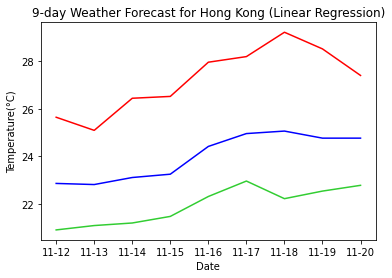

In [21]:
weather_forecast = pd.DataFrame(columns=['Date','Max Temp','Min Temp','Mean Temp'],index=[i for i in range(1,10)])
dates = []
for i in range(1, 10):
  today = datetime.now() + timedelta(days = i)
  weather_forecast.loc[i] = LR(today.day, today.month, today.year)
  dates.append(str(today.month)+'-'+f"{today.day:02d}")

print('Linear Regression:')
print(weather_forecast)
plt.title("9-day Weather Forecast for Hong Kong (Linear Regression)")
plt.xlabel("Date")
plt.ylabel("Temperature(°C)")
plt.plot(dates, weather_forecast['Max Temp'],color='red')
plt.plot(dates, weather_forecast['Min Temp'],color='limegreen')
plt.plot(dates, weather_forecast['Mean Temp'],color='blue')
plt.show()
print()

Non Linear Regression:
         Date   Max Temp   Min Temp  Mean Temp
1  2022-11-12  25.283502  22.003351   23.28044
2  2022-11-13   24.95822  22.130718    23.3122
3  2022-11-14  27.364588  22.053836  23.929968
4  2022-11-15   27.23607  22.194045  24.139151
5  2022-11-16  28.732409  23.610065  25.387448
6  2022-11-17  29.793629  24.124237  26.199711
7  2022-11-18  30.438592   23.48231  26.334108
8  2022-11-19   28.75225  23.322109  25.237597
9  2022-11-20  27.279638  23.397075  25.092209


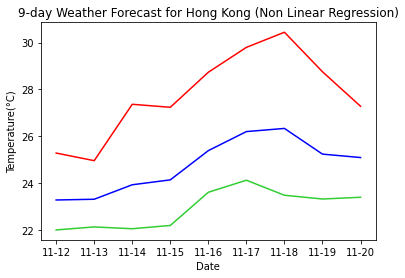

In [22]:
weather_forecast = pd.DataFrame(columns=['Date','Max Temp','Min Temp','Mean Temp'],index=[i for i in range(1,10)])
for i in range(1, 10):
  today = datetime.now() + timedelta(days = i)
  weather_forecast.loc[i] = NLR(today.day, today.month, today.year, 3)
print('Non Linear Regression:')
print(weather_forecast)
plt.title("9-day Weather Forecast for Hong Kong (Non Linear Regression)")
plt.xlabel("Date")
plt.ylabel("Temperature(°C)")
plt.plot(dates, weather_forecast['Max Temp'],color='red')
plt.plot(dates, weather_forecast['Min Temp'],color='limegreen')
plt.plot(dates, weather_forecast['Mean Temp'],color='blue')
plt.show()
print()

Decision Tree Regressor:
         Date Max Temp Min Temp Mean Temp
1  2022-11-12     26.7     18.5      22.1
2  2022-11-13     25.7     19.1      21.5
3  2022-11-14     26.2     17.9      21.1
4  2022-11-15     25.6     18.8      21.1
5  2022-11-16     27.5     19.2      22.6
6  2022-11-17     25.8     20.5      22.7
7  2022-11-18     26.1     18.2      21.7
8  2022-11-19     26.8     19.3      22.5
9  2022-11-20     27.4     21.0      23.7


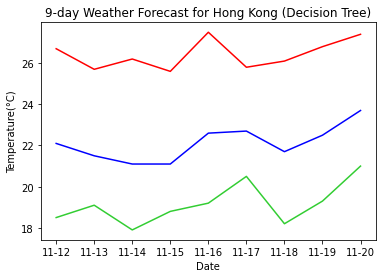

In [23]:
weather_forecast = pd.DataFrame(columns=['Date','Max Temp','Min Temp','Mean Temp'],index=[i for i in range(1,10)])
for i in range(1,10):
  today = datetime.now() + timedelta(days = i)
  weather_forecast.loc[i] = DTR(today.day, today.month, today.year, 6)
print('Decision Tree Regressor:')
print(weather_forecast)
plt.title("9-day Weather Forecast for Hong Kong (Decision Tree)")
plt.xlabel("Date")
plt.ylabel("Temperature(°C)")
plt.plot(dates, weather_forecast['Max Temp'],color='red')
plt.plot(dates, weather_forecast['Min Temp'],color='limegreen')
plt.plot(dates, weather_forecast['Mean Temp'],color='blue')
plt.show()
print()